<a href="https://colab.research.google.com/github/GaurangRawat/NLP/blob/main/Language%20Translator/Translator_using_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Libraries
---

In [1]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 12.8 MB/s eta 0:00:00


In [2]:
from textblob import Word
import nltk
nltk.data.path.append("/kaggle/working/")
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
# Libraray for Data Manipulation
import numpy as np
import pandas as pd

# Libraray for Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white",font_scale=1.5)
sns.set(rc={"axes.facecolor":"#FFFAF0","figure.facecolor":"#FFFAF0"})
sns.set_context("poster",font_scale = .7)

# Library for preprocessing
import contractions
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
import spacy
import math
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import Parallel, delayed
import re,string,unicodedata
from sklearn.model_selection import train_test_split
from textblob import TextBlob
from scipy.sparse import lil_matrix
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk import pos_tag

# Library for model building
from tensorflow.keras.regularizers import l2
import tensorflow
import keras
from keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.models import Sequential,Model
#from attention import BahdanauAttention
from keras.layers import SimpleRNN,LSTM,GRU, Embedding, Dense, SpatialDropout1D, Dropout, BatchNormalization, Bidirectional, Attention, Input
from sklearn.metrics import accuracy_score
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.optimizers import Adam

#Library to overcome Warnings
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

##Importing Dataset
----

In [4]:
data = pd.read_csv('Dataset_English_Hindi.csv')

In [5]:
data.sample(5)

,English,Hindi
56903,"What Badruddin wantedand finally got , was an ...",बदरूद्दीन जो चाहते थे और जो उन्होंने आखिरकार ह...
59663,Members should not approach the Chair personal...,सदस्यों को स्वयं अध्यक्ष-पीठ के पास नहीं जाना ...
36852,Later on the diabetic gets dryness of the mout...,"तत्पश्चात रोगी का मूंह , तालू तथा गला सुख जाता..."
25418,"Haemophiliac men , if they survive and reach t...",हीमोफिलिया से पीड़ित पुरूष यदि प्रजनन करने योग...
69314,Many Muslims were attracted back towards Islam...,सूफियों के कारण कई मुसलमान धर्म की ओर वापस आकर...


##Data Exploration
---

In [6]:
data.shape

(130476, 2)

### Statistical Summary
---

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130476 entries, 0 to 130475
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   English  130474 non-null  object
 1   Hindi    130164 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


Duplicated Data

In [8]:
data.duplicated().sum()

2788

Missing Data

In [9]:
missing_data = data.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(data))*100,2)
missing_data

,Total No. of Missing Values,% of Missing Values
English,2,0.00
Hindi,312,0.24


In [10]:
round(data.describe().T,2)

,count,unique,top,freq
English,130474,126959,(Laughter),555
Hindi,130164,100228,(हँसी),212


## Preprocessing
---

Dropping Duplicated and Null Values

In [11]:
data.dropna(inplace=True)
data

,English,Hindi
0,Help!,बचाओ!
1,Jump.,उछलो.
2,Jump.,कूदो.
3,Jump.,छलांग.
4,Hello!,नमस्ते।
...,...,...
130471,Examples of art deco construction can be found...,आर्ट डेको शैली के निर्माण मैरीन ड्राइव और ओवल ...
130472,and put it in our cheeks.,और अपने गालों में डाल लेते हैं।
130473,"As for the other derivatives of sulphur , the ...","जहां तक गंधक के अन्य उत्पादों का प्रश्न है , द..."
130474,its complicated functioning is defined thus in...,Zरचना-प्रकिया को उसने एक पहेली में यों बांधा है .


In [12]:
data.isnull().sum()

,0
English,0
Hindi,0


In [13]:
data.drop_duplicates(inplace=True)
data

,English,Hindi
0,Help!,बचाओ!
1,Jump.,उछलो.
2,Jump.,कूदो.
3,Jump.,छलांग.
4,Hello!,नमस्ते।
...,...,...
130471,Examples of art deco construction can be found...,आर्ट डेको शैली के निर्माण मैरीन ड्राइव और ओवल ...
130472,and put it in our cheeks.,और अपने गालों में डाल लेते हैं।
130473,"As for the other derivatives of sulphur , the ...","जहां तक गंधक के अन्य उत्पादों का प्रश्न है , द..."
130474,its complicated functioning is defined thus in...,Zरचना-प्रकिया को उसने एक पहेली में यों बांधा है .


In [14]:
data.duplicated().sum()

0

In [15]:
data.shape

(127375, 2)

Lowering Case

In [16]:
data['English'] = data['English'].str.lower()

Remove HTML tags

In [17]:
import re
def remove_html_tags(text):
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern,'',text)
    return text

In [18]:
data['English'] = data['English'].apply(remove_html_tags)

Removing URL

In [19]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',text)

data['English'] = data['English'].apply(remove_url)
data['Hindi'] = data['Hindi'].apply(remove_url)

Chat Word Treatment

In [20]:
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laughter",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "LOL": "Laughing out loud",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don’t care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "IDC": "I don’t care",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "LMAO": "Laughing my a** off",
    "BFF": "Best friends forever",
    "CSL": "Can’t stop laughing",
}

Removing Emojis

In [21]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [22]:
data['English'] = data['English'].apply(remove_emoji)
data['Hindi'] = data['Hindi'].apply(remove_emoji)

Removing Contraction

In [23]:
def expand_contractions(text):
    expanded_text = contractions.fix(text)
    return expanded_text

data['English'] = data['English'].apply(expand_contractions)

Removing Non-Hindi and Alphanumeric Characters

In [24]:
def preprocess_text(text, language='english'):
    if not isinstance(text, str):
        return text

    if language == 'english':
        pattern = re.compile(r'[^a-zA-Z0-9\s]')
        return pattern.sub(r'', text)
    elif language == 'hindi':
        pattern = re.compile(r'[^\u0900-\u097F\s]')
        return pattern.sub(r'', text)
    else:
        raise ValueError("Unsupported Language, Supported languages are 'english' and 'hindi'")

data['English'] = data['English'].apply(lambda x: preprocess_text(x, language='english'))
data['Hindi'] = data['Hindi'].apply(lambda x: preprocess_text(x, language='hindi'))

In [25]:
data.sample(5)

,English,Hindi
83123,half century of my poetry,मेरी कविताई की आधी सदी
72501,he asked who is your teacher brother,तब सारिपुत्र ने पूछा ऋऋभनऋऊण्श्छ्ष्ते आपका गु...
81176,and even there it is him who advises them,तब भी सलाह तो राष्ट्रपति ही उन्हें देते हैं
103027,if they saw me running up and down this hill,अगर वे मुझे ऐसे पहाड़ी पर इधरउधर भागते हुए दे...
119415,the number stanzas in linga puran is eleven th...,लिंगपुराण में श्लोकों की संख्या ग्यारह हजार हैं।


WordCloud

In [26]:
# Function to preprocess text and generate word cloud
def generate_wordcloud(text_list, language):
    # Join the list of words into a single string
    text_str = ' '.join(map(str, text_list))

    # Generate word cloud without specifying font path
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_str)

    # Display word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for {language} Text")
    plt.axis('off')
    plt.show()

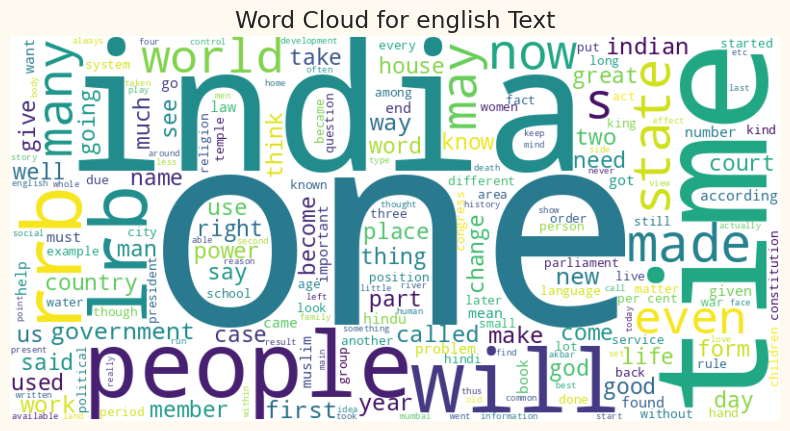

In [27]:
# Generate word clouds for English and Hindi columns
generate_wordcloud(data['English'], 'english')

In [28]:
data.shape

(127375, 2)

In [29]:
data = data[data['English'].str.len() <= 50]

In [30]:
data.shape

(50019, 2)

In [31]:
# Add <start> and <end> tokens to Hindi sentences
data['Hindi'] = ['<start> ' + sentence + ' <end>' for sentence in data['Hindi']]

Tokenize the Data

In [32]:
tok = Tokenizer()
tok.fit_on_texts(data['English'])

In [33]:
tok_hindi = Tokenizer()
tok_hindi.fit_on_texts(data['Hindi'])

In [34]:
len(tok.word_index),len(tok_hindi.word_index)

(22657, 24545)

In [35]:
len(tok.word_index),len(tok_hindi.word_index)

(22657, 24545)

In [36]:
tok.document_count

50019

Converting Data into Numerical Form

In [37]:
data['English'] = tok.texts_to_sequences(data['English'])
data['Hindi'] = tok_hindi.texts_to_sequences(data['Hindi'])

In [38]:
data

,English,Hindi
0,[147],"[1, 12946, 2]"
1,[2835],"[1, 12947, 2]"
2,[2835],"[1, 12948, 2]"
3,[2835],"[1, 4554, 2]"
4,[3803],"[1, 9649, 2]"
...,...,...
130461,"[62, 52, 10, 14, 6, 936, 157]","[1, 98, 48, 21, 11, 1826, 164, 9, 2]"
130462,"[1, 22656, 14, 10039, 26, 4587]","[1, 106, 2923, 9401, 17, 3263, 8, 3247, 46, 51..."
130464,"[5, 49, 13, 97, 9, 4, 254, 56, 459]","[1, 86, 22, 179, 9, 14, 13, 1281, 850, 2]"
130466,"[363, 47, 16, 214, 343]","[1, 1116, 37, 34, 1399, 15, 7, 16, 2]"


In [39]:
def calculate_max_sequence_length(eng,hindi):
    max_length_combined = max(max(len(seq) for seq in eng), max(len(seq) for seq in hindi))

    return max_length_combined

max_length_combined = calculate_max_sequence_length(data['English'],data['Hindi'])
max_length_combined

260

In [40]:
for num in data['English'][0]:
    print(num, end=' ')

147 

In [41]:
# Print corresponding words horizontally
for num in data['English'][0]:
    word = tok.index_word.get(num, 'UNK')
    print(word, end=' ')

help 

In [42]:
for num in data['Hindi'][0]:
    word = tok_hindi.index_word.get(num)
    print(word,end = " ")

start बचाओ end 

Seperating the data in dependent and independent

In [43]:
hindi = data['Hindi']
english = data['English']

Padding

In [44]:
x = pad_sequences(english,maxlen = max_length_combined,padding = 'post')
y = pad_sequences(hindi,maxlen = max_length_combined,padding = 'post')

In [45]:
x

array([[ 147,    0,    0, ...,    0,    0,    0],
       [2835,    0,    0, ...,    0,    0,    0],
       [2835,    0,    0, ...,    0,    0,    0],
       ...,
       [   5,   49,   13, ...,    0,    0,    0],
       [ 363,   47,   16, ...,    0,    0,    0],
       [   2,  188,   12, ...,    0,    0,    0]], dtype=int32)

In [46]:
y

array([[    1, 12946,     2, ...,     0,     0,     0],
       [    1, 12947,     2, ...,     0,     0,     0],
       [    1, 12948,     2, ...,     0,     0,     0],
       ...,
       [    1,    86,    22, ...,     0,     0,     0],
       [    1,  1116,    37, ...,     0,     0,     0],
       [    1,     6,    41, ...,     0,     0,     0]], dtype=int32)

Seperating Train , Test and Evaluation Data

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [48]:
# Check the shape of the resulting arrays
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (40015, 260)
Shape of x_test: (10004, 260)
Shape of y_train: (40015, 260)
Shape of y_test: (10004, 260)


## Modelling
---

ENCODER-DECODER MODEL

In [49]:
max_length_input = x_train.shape[1]
max_length_output = y_train.shape[1]
input_vocab_size = len(tok.word_index) + 1
output_vocab_size = len(tok_hindi.word_index) + 1

# Define Encoder model
encoder_inputs = Input(shape=(max_length_input,))
encoder_embedding = Embedding(input_dim=input_vocab_size, output_dim=260)(encoder_inputs)
encoder_lstm = LSTM(156, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)
encoder_states = [state_h, state_c]

# Define Decoder model
decoder_inputs = Input(shape=(max_length_output,))
decoder_embedding = Embedding(input_dim=output_vocab_size, output_dim=260)(decoder_inputs)
decoder_lstm = LSTM(156, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
decoder_dense = Dense(output_vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the full Encoder-Decoder model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 260)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, 260)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 260, 260)       │      5,891,080 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 260, 260)       │      6,381,960 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ [(None, 156), (None,   │        260,208 │ embedding[0][0]        │
│                           │ 156), (None, 156)]     │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ [(None, 260, 156),     │        260,208 │ embedding_1[0][0],     │
│                           │ (None, 156), (None,    │                │ lstm[0][1], lstm[0][2] │
│                           │ 156)]                  │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 260, 24546)     │      3,853,722 │ lstm_1[0][0]           │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 16,647,178 (63.50 MB)

 Trainable params: 16,647,178 (63.50 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('model_checkpoint.keras', save_best_only=True)  # Updated filepath

# Train the model with callbacks
history = model.fit(
    x=[x_train, y_train],# Exclude last token from decoder input
    y=y_train,   # Exclude first token from decoder target
    batch_size=32,
    epochs=5,
    validation_data=([x_test, y_test], y_test),
    callbacks=[early_stopping, model_checkpoint],
)

Epoch 1/5
1251/1251 ━━━━━━━━━━━━━━━━━━━━ 324s 254ms/step - accuracy: 0.9661 - loss: 0.9194 - val_accuracy: 0.9838 - val_loss: 0.1327
Epoch 2/5
1251/1251 ━━━━━━━━━━━━━━━━━━━━ 319s 255ms/step - accuracy: 0.9854 - loss: 0.1191 - val_accuracy: 0.9897 - val_loss: 0.0897
Epoch 3/5
1251/1251 ━━━━━━━━━━━━━━━━━━━━ 322s 255ms/step - accuracy: 0.9907 - loss: 0.0804 - val_accuracy: 0.9930 - val_loss: 0.0642
Epoch 4/5
1251/1251 ━━━━━━━━━━━━━━━━━━━━ 322s 255ms/step - accuracy: 0.9936 - loss: 0.0568 - val_accuracy: 0.9949 - val_loss: 0.0487
Epoch 5/5
1251/1251 ━━━━━━━━━━━━━━━━━━━━ 322s 255ms/step - accuracy: 0.9953 - loss: 0.0411 - val_accuracy: 0.9960 - val_loss: 0.0379


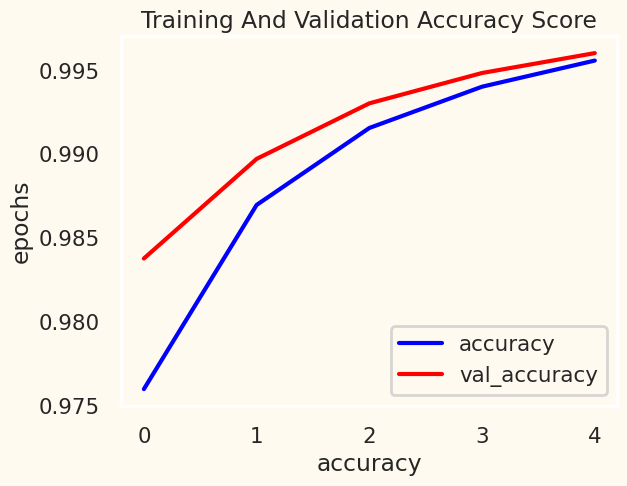

In [51]:
plt.plot(history.history['accuracy'],color = 'blue',label = 'accuracy')
plt.plot(history.history['val_accuracy'],color = 'red',label = 'val_accuracy')
plt.title("Training And Validation Accuracy Score")
plt.xlabel("accuracy")
plt.ylabel("epochs")
plt.grid()
plt.legend()
plt.show()

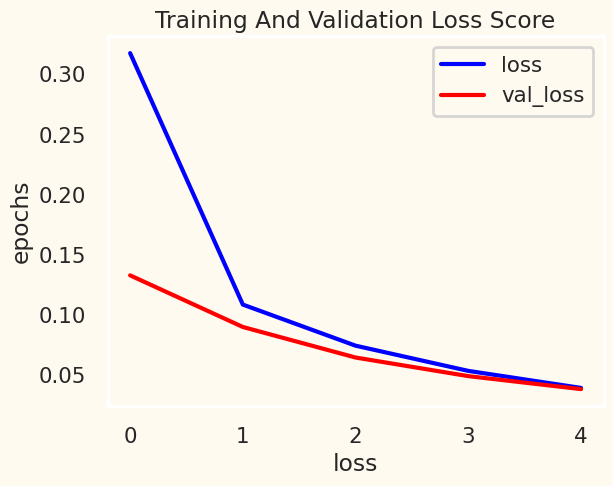

In [52]:
plt.plot(history.history['loss'],color = 'blue',label = 'loss')
plt.plot(history.history['val_loss'],color = 'red',label = 'val_loss')
plt.title("Training And Validation Loss Score")
plt.xlabel("loss")
plt.ylabel("epochs")
plt.grid()
plt.legend()
plt.show()

In [53]:
import numpy as np
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

# Reverse token dictionaries
rev_tok_hindi = {idx: word for word, idx in tok_hindi.word_index.items()}

# Select a subset of test data
num_samples = 10
x_test_subset = x_test[:num_samples]
y_test_padded_subset = y_test[:num_samples]

# Predict
predictions = model.predict([x_test_subset, y_test_padded_subset], batch_size=16)
print('Shape of predictions:', predictions.shape)

# Convert predictions to token indices
predicted_tokens_np = np.argmax(predictions, axis=-1)
print('Shape of predicted_tokens:', predicted_tokens_np.shape)

# Map indices to tokens and remove 'start' and 'end' tokens
predicted_sentences = []
for sample in predicted_tokens_np:
    sentence = ' '.join([rev_tok_hindi.get(token, '<unknown>') for token in sample if token != 0 and token not in [tok_hindi.word_index.get('start'), tok_hindi.word_index.get('end')]])  # Exclude padding, 'start', and 'end' tokens
    predicted_sentences.append(sentence)

# Reverse token dictionary for English (assuming you have `tok_english` for English tokens)
rev_tok_english = {idx: word for word, idx in tok.word_index.items()}

# Map the English test inputs to their corresponding sentences
english_sentences = []
for sample in x_test_subset:
    sentence = ' '.join([rev_tok_english.get(token, '<unknown>') for token in sample if token != 0])  # Exclude padding token
    english_sentences.append(sentence)

# Print English sentence followed by predicted Hindi sentence
for idx, (eng_sentence, hin_sentence) in enumerate(zip(english_sentences, predicted_sentences)):
    print(f'English sentence {idx + 1}: {eng_sentence}')
    print(f'Predicted Hindi translation {idx + 1}: {hin_sentence}\n')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step
Shape of predictions: (10, 260, 24546)
Shape of predicted_tokens: (10, 260)
English sentence 1: islams golden age began in the rule of abbasioan
Predicted Hindi translation 1: के राज में इस्लाम का स्वर्ण युग शुरु हुआ।

English sentence 2: even of salinas
Predicted Hindi translation 2: श्रेणीबिहार तक की

English sentence 3: adhikashh poetic creation he has chosen post
Predicted Hindi translation 3: के उन्होंने पद ही चुने हैं।

English sentence 4: was i had this really
Predicted Hindi translation 4: ये थी कि मुझे एक सचमुच

English sentence 5: and transform it
Predicted Hindi translation 5: और करते है

English sentence 6: if they really had technology assessment
Predicted Hindi translation 6: अगर उनके पास सहायता होती

English sentence 7: included in secondary pollutant
Predicted Hindi translation 7: में शामिल है

English sentence 8: cut down on sweets chips and soda
Predicted Hindi translation 8: चीजें और का प्रयोग कम करना होगा

English sentence 9: p

In [54]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Attention, Concatenate
from tensorflow.keras.models import Model

# Define Encoder model
encoder_inputs = Input(shape=(max_length_input,))
encoder_embedding = Embedding(input_dim=input_vocab_size, output_dim=260)(encoder_inputs)
encoder_lstm = LSTM(156, return_sequences=True, return_state=True)  # Ensure return_sequences=True
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)
encoder_states = [state_h, state_c]

# Define Decoder model
decoder_inputs = Input(shape=(max_length_output,))
decoder_embedding = Embedding(input_dim=output_vocab_size, output_dim=260)(decoder_inputs)
decoder_lstm = LSTM(156, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)

# Attention Layer
attention = Attention()([decoder_outputs, encoder_outputs])

# Concatenate attention output with decoder outputs
decoder_concat_input = Concatenate(axis=-1)([decoder_outputs, attention])

# Dense Layer for output prediction
decoder_dense = Dense(output_vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_concat_input)

# Define the full Encoder-Decoder model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 260)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_3             │ (None, 260)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_2 (Embedding)   │ (None, 260, 260)       │      5,891,080 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_3 (Embedding)   │ (None, 260, 260)       │      6,381,960 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_2 (LSTM)             │ [(None, 260, 156),     │        260,208 │ embedding_2[0][0]      │
│                           │ (None, 156), (None,    │                │                        │
│                           │ 156)]                  │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_3 (LSTM)             │ [(None, 260, 156),     │        260,208 │ embedding_3[0][0],     │
│                           │ (None, 156), (None,    │                │ lstm_2[0][1],          │
│                           │ 156)]                  │                │ lstm_2[0][2]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention (Attention)     │ (None, 260, 156)       │              0 │ lstm_3[0][0],          │
│                           │                        │                │ lstm_2[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 260, 312)       │              0 │ lstm_3[0][0],          │
│                           │                        │                │ attention[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 260, 24546)     │      7,682,898 │ concatenate[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 20,476,354 (78.11 MB)

 Trainable params: 20,476,354 (78.11 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('model_checkpoint.keras', save_best_only=True)  # Updated filepath

# Train the model with callbacks
history = model.fit(
    x=[x_train, y_train],# Exclude last token from decoder input
    y=y_train,   # Exclude first token from decoder target
    batch_size=32,
    epochs=5,
    validation_data=([x_test, y_test], y_test),
    callbacks=[early_stopping, model_checkpoint],
)

Epoch 1/5
1251/1251 ━━━━━━━━━━━━━━━━━━━━ 400s 318ms/step - accuracy: 0.9686 - loss: 0.6460 - val_accuracy: 0.9856 - val_loss: 0.1218
Epoch 2/5
1251/1251 ━━━━━━━━━━━━━━━━━━━━ 441s 317ms/step - accuracy: 0.9874 - loss: 0.1066 - val_accuracy: 0.9914 - val_loss: 0.0783
Epoch 3/5
1251/1251 ━━━━━━━━━━━━━━━━━━━━ 448s 322ms/step - accuracy: 0.9923 - loss: 0.0677 - val_accuracy: 0.9943 - val_loss: 0.0551
Epoch 4/5
1251/1251 ━━━━━━━━━━━━━━━━━━━━ 441s 321ms/step - accuracy: 0.9949 - loss: 0.0461 - val_accuracy: 0.9959 - val_loss: 0.0414
Epoch 5/5
1251/1251 ━━━━━━━━━━━━━━━━━━━━ 442s 321ms/step - accuracy: 0.9964 - loss: 0.0313 - val_accuracy: 0.9968 - val_loss: 0.0328


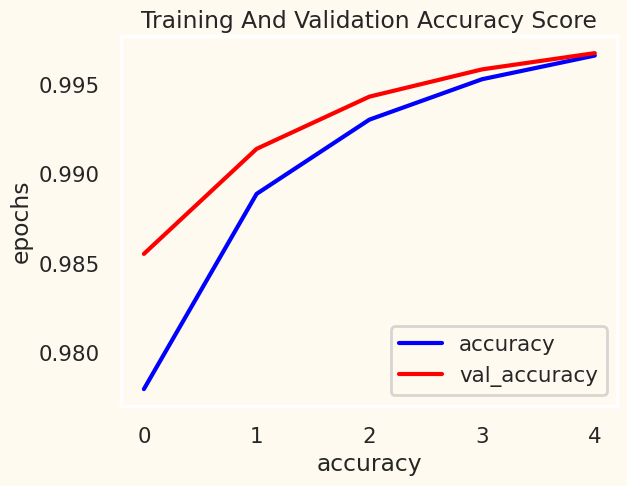

In [56]:
plt.plot(history.history['accuracy'],color = 'blue',label = 'accuracy')
plt.plot(history.history['val_accuracy'],color = 'red',label = 'val_accuracy')
plt.title("Training And Validation Accuracy Score")
plt.xlabel("accuracy")
plt.ylabel("epochs")
plt.grid()
plt.legend()
plt.show()

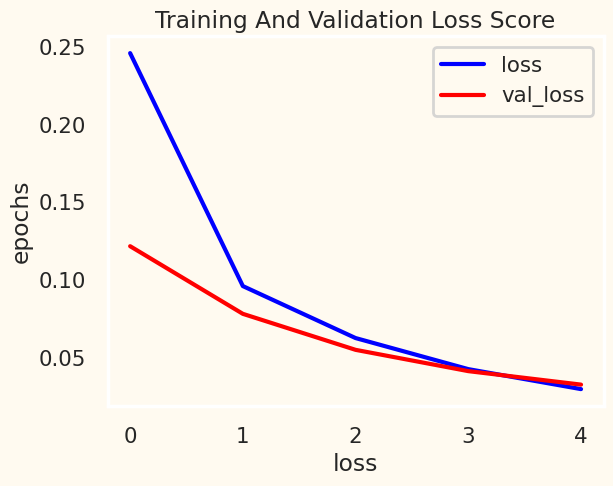

In [57]:
plt.plot(history.history['loss'],color = 'blue',label = 'loss')
plt.plot(history.history['val_loss'],color = 'red',label = 'val_loss')
plt.title("Training And Validation Loss Score")
plt.xlabel("loss")
plt.ylabel("epochs")
plt.grid()
plt.legend()
plt.show()

In [58]:
import numpy as np
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

# Reverse token dictionaries
rev_tok_hindi = {idx: word for word, idx in tok_hindi.word_index.items()}

# Select a subset of test data
num_samples = 10
x_test_subset = x_test[:num_samples]
y_test_padded_subset = y_test[:num_samples]

# Predict
predictions = model.predict([x_test_subset, y_test_padded_subset], batch_size=16)
print('Shape of predictions:', predictions.shape)

# Convert predictions to token indices
predicted_tokens_np = np.argmax(predictions, axis=-1)
print('Shape of predicted_tokens:', predicted_tokens_np.shape)

# Map indices to tokens and remove 'start' and 'end' tokens
predicted_sentences = []
for sample in predicted_tokens_np:
    sentence = ' '.join([rev_tok_hindi.get(token, '<unknown>') for token in sample if token != 0 and token not in [tok_hindi.word_index.get('start'), tok_hindi.word_index.get('end')]])  # Exclude padding, 'start', and 'end' tokens
    predicted_sentences.append(sentence)

# Reverse token dictionary for English (assuming you have `tok_english` for English tokens)
rev_tok_english = {idx: word for word, idx in tok.word_index.items()}

# Map the English test inputs to their corresponding sentences
english_sentences = []
for sample in x_test_subset:
    sentence = ' '.join([rev_tok_english.get(token, '<unknown>') for token in sample if token != 0])  # Exclude padding token
    english_sentences.append(sentence)

# Print English sentence followed by predicted Hindi sentence
for idx, (eng_sentence, hin_sentence) in enumerate(zip(english_sentences, predicted_sentences)):
    print(f'English sentence {idx + 1}: {eng_sentence}')
    print(f'Predicted Hindi translation {idx + 1}: {hin_sentence}\n')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
Shape of predictions: (10, 260, 24546)
Shape of predicted_tokens: (10, 260)
English sentence 1: islams golden age began in the rule of abbasioan
Predicted Hindi translation 1: अंगरक्षक के राज में इस्लाम का स्वर्ण युग शुरु हुआ।

English sentence 2: even of salinas
Predicted Hindi translation 2: घ् तक की

English sentence 3: adhikashh poetic creation he has chosen post
Predicted Hindi translation 3: श्रेणीऊर्जा के कायस्थ उन्होंने पद ही चुने हैं।

English sentence 4: was i had this really
Predicted Hindi translation 4: ये थी कि मुझे एक सचमुच

English sentence 5: and transform it
Predicted Hindi translation 5: और करते है

English sentence 6: if they really had technology assessment
Predicted Hindi translation 6: अगर उनके पास तकनिकी सहायता होती

English sentence 7: included in secondary pollutant
Predicted Hindi translation 7: फिश प्रोटीन में शामिल है

English sentence 8: cut down on sweets chips and soda
Predicted Hindi translation 8: फिश चीजें और का 

In [60]:
# Save the entire model
model.save('encoder_decoder_model.h5')
print('Model saved succesfully!!')

Model saved succesfully!!
